In [214]:
#importing library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [9]:
#loading the data set
data =pd.read_csv('industry.csv')

In [10]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [11]:
df=pd.DataFrame(data) #converting data into dataframe

In [12]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [13]:
df.head()
# passing first five values

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [14]:
df.tail()
#passing last five values

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [15]:
#count of number of rows and coloumns
df.shape

(10000, 14)

In [16]:
#generating all the column names
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [17]:
#describes the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [18]:
df.describe()
#generating descriptive statistics

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [19]:
df.dtypes
#shows the data types of all the columns

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [20]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [21]:
#handling missing values

In [22]:
#finding whether there is any null values
df.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#finding the na or none values
df.isna()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.isna().sum() 
#describes the sum of all na or none values in each column (count)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [25]:
df.dropna()
#if any na values exist then it is dropped or removed 

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [26]:
df.duplicated()
#duplicate values are identified here 

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [27]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [28]:
#renaming the column names if required

In [29]:
df=df.rename(columns={'Air temperature [K]': 'Air Temperature'})

In [30]:
df=df.rename(columns={'Process temperature [K]':'Process Temperature'})

In [31]:
df=df.rename(columns={'Rotational speed [rpm]':'Rotational Speed'})

In [32]:
df=df.rename(columns={'Torque [Nm]':'Torque'})

In [33]:
df=df.rename(columns={'Tool wear [min]':'Tool Wear'})

In [34]:
df

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [35]:
b=df['Machine failure'].value_counts()
#count of a particular column is generated

In [36]:
b

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [37]:
df['Machine failure'].unique()
#gets the unique values from the specific column

array([0, 1])

In [38]:
#replacing

In [39]:
df.replace({'TWF':{1:'true',0:'false'}},inplace=True)
#values inside the column is replaced if required

In [40]:
df.replace({'Machine failure':{1:'true',0:'false'}},inplace=True)
#inplace :data is renamed inplace which returns nothing

In [41]:
df.replace({'HDF':{1:'true',0:'false'}},inplace=True)

In [42]:
df.replace({'PWF':{1:'true',0:'false'}},inplace=True)

In [43]:
df.replace({'OSF':{1:'true',0:'false'}},inplace=True)

In [44]:
df.replace({'RNF':{1:'true',0:'false'}},inplace=True)

In [45]:
df

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,false,false,false,false,false,false
1,2,L47181,L,298.2,308.7,1408,46.3,3,false,false,false,false,false,false
2,3,L47182,L,298.1,308.5,1498,49.4,5,false,false,false,false,false,false
3,4,L47183,L,298.2,308.6,1433,39.5,7,false,false,false,false,false,false
4,5,L47184,L,298.2,308.7,1408,40.0,9,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,false,false,false,false,false,false
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,false,false,false,false,false,false
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,false,false,false,false,false,false
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,false,false,false,false,false,false


In [46]:
#flitering
filtered_df=df[df['Type']=='L']

In [47]:
filtered_df

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1,2,L47181,L,298.2,308.7,1408,46.3,3,false,false,false,false,false,false
2,3,L47182,L,298.1,308.5,1498,49.4,5,false,false,false,false,false,false
3,4,L47183,L,298.2,308.6,1433,39.5,7,false,false,false,false,false,false
4,5,L47184,L,298.2,308.7,1408,40.0,9,false,false,false,false,false,false
6,7,L47186,L,298.1,308.6,1558,42.4,14,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,L57168,L,298.9,308.6,1771,24.1,213,false,false,false,false,false,false
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,false,false,false,false,false,false
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,false,false,false,false,false,false
9993,9994,L57173,L,298.8,308.4,1401,47.3,10,false,false,false,false,false,false


In [48]:
#filter using and operator with two Columns
f1 = df[(df['Type'] == 'L') & (df['Air Temperature'] == 298.2)]

In [49]:
f1

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1,2,L47181,L,298.2,308.7,1408,46.3,3,false,false,false,false,false,false
3,4,L47183,L,298.2,308.6,1433,39.5,7,false,false,false,false,false,false
4,5,L47184,L,298.2,308.7,1408,40.0,9,false,false,false,false,false,false
171,172,L47351,L,298.2,308.1,1462,50.8,27,false,false,false,false,false,false
174,175,L47354,L,298.2,308.1,1306,58.3,35,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9952,L57131,L,298.2,307.8,1355,59.4,115,false,false,false,false,false,false
9952,9953,L57132,L,298.2,307.8,1429,46.9,117,false,false,false,false,false,false
9960,9961,L57140,L,298.2,307.8,1575,35.0,137,false,false,false,false,false,false
9961,9962,L57141,L,298.2,307.9,1399,54.9,139,false,false,false,false,false,false


In [50]:
#sorting
sort_s=df.sort_values(by='Machine failure')

In [51]:
sort_s

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,false,false,false,false,false,false
6630,6631,M21490,M,301.6,310.5,1414,49.3,106,false,false,false,false,false,false
6631,6632,M21491,M,301.5,310.4,1378,55.3,109,false,false,false,false,false,false
6632,6633,L53812,L,301.4,310.4,1301,51.2,112,false,false,false,false,false,false
6633,6634,M21493,M,301.5,310.5,1737,29.3,114,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,L47783,L,297.9,309.8,1336,71.6,31,true,false,false,true,false,false
7167,7168,L54347,L,300.3,310.3,1362,60.3,206,true,false,false,false,true,false
6673,6674,L53853,L,301.6,310.7,1380,51.8,216,true,false,false,false,true,false
1161,1162,L48341,L,297.0,307.8,1316,61.2,200,true,false,false,false,true,false


In [52]:
grouped_df=df.groupby('Type')['Tool Wear'].mean()

In [53]:
grouped_df

Type
H    107.419741
L    108.378833
M    107.272272
Name: Tool Wear, dtype: float64

In [54]:
df.describe()

,UDI,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000


In [55]:
df

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,false,false,false,false,false,false
1,2,L47181,L,298.2,308.7,1408,46.3,3,false,false,false,false,false,false
2,3,L47182,L,298.1,308.5,1498,49.4,5,false,false,false,false,false,false
3,4,L47183,L,298.2,308.6,1433,39.5,7,false,false,false,false,false,false
4,5,L47184,L,298.2,308.7,1408,40.0,9,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,false,false,false,false,false,false
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,false,false,false,false,false,false
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,false,false,false,false,false,false
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,false,false,false,false,false,false


In [56]:
g=df['Rotational Speed']
l=df['Torque']

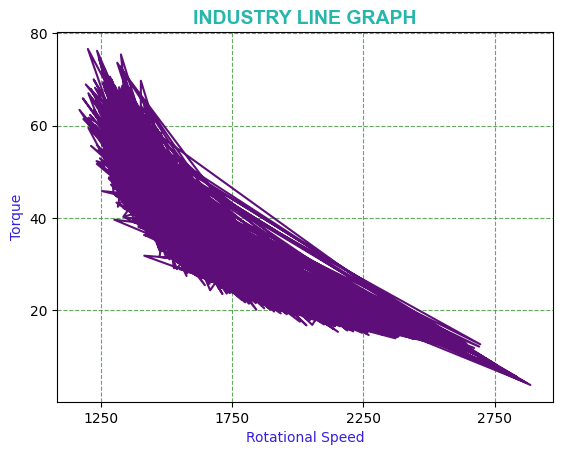

In [57]:
#line Plot
plt.plot(g,l,color='#5E0E79') #ploting and giving color to the line
plt.title("INDUSTRY LINE GRAPH",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family 
plt.xlabel('Rotational Speed',color='#351fe3') #label for X axis and color
plt.ylabel('Torque',color='#351fe3') #Label for Y axis and color
plt.xticks([1250,1750,2250,2750]) #values that are displayed on x axis 
plt.yticks([20,40,60,80]) #values that are displayed on Y axis
plt.grid(True,linestyle='--',linewidth=.8,alpha=.7,color='#24851E') #displaying the grid lines with style width and color

In [58]:
#bar Plot

In [59]:
categories=df['Rotational Speed']
values=df['Machine failure']

Text(0.5, 1.0, 'BAR DIAGRAM')

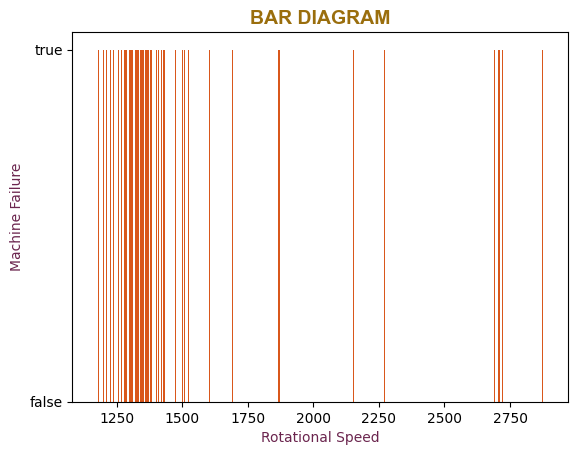

In [60]:
plt.bar(categories,values,color='#D9571B') #ploting
plt.xlabel('Rotational Speed',color='#6B254E')
plt.ylabel('Machine Failure',color='#6B254E')
plt.title('BAR DIAGRAM',fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#9A6E0D'})  #describes the title and font family 

In [61]:
r=df['Torque']

Text(0.5, 1.0, 'HISTOGRAM')

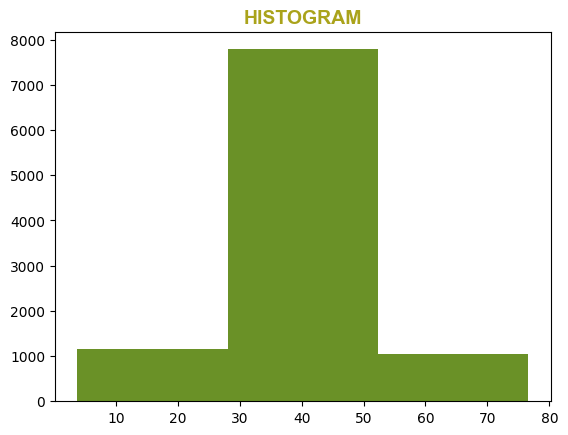

In [62]:
#histogram
plt.hist(r,bins=3,color='#6A9127')
plt.title("HISTOGRAM",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#AAA31B'})

In [63]:
categories=df['Rotational Speed']
values=df['Torque']

Text(0.5, 1.0, 'PIE CHART')

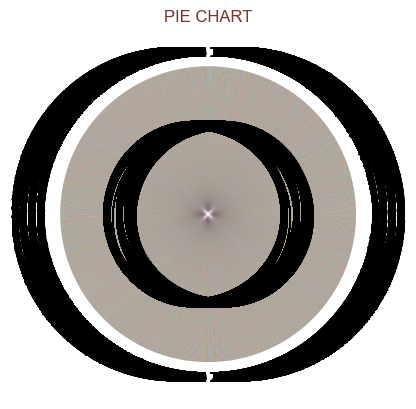

In [64]:
#pie chart
plt.pie(values,labels=categories,autopct='%1.1f%%')
plt.title("PIE CHART",fontdict={'fontsize':12,'fontname':'Arial','color':'#813131','fontweight':6})

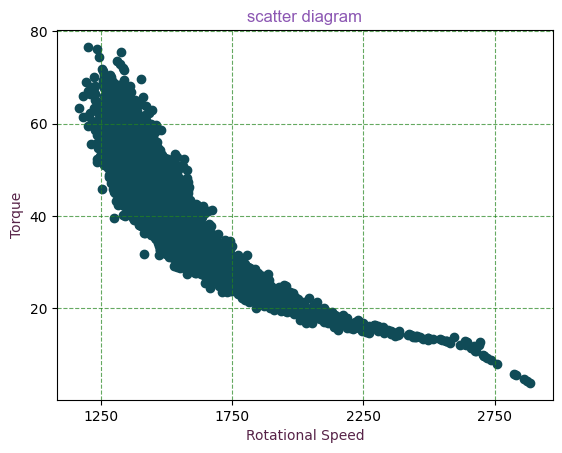

In [65]:
#scatter plot
plt.scatter(g,l,color='#104B57') #ploting
plt.title("scatter diagram",fontdict={'fontsize':12,'fontname':'Arial','color':'#8C57B3','fontweight':6}) #describes the title and font family
plt.xlabel("Rotational Speed",color='#572348')
plt.ylabel("Torque",color='#572348')
plt.xticks([1250,1750,2250,2750]) #values that are displayed on x axis 
plt.yticks([20,40,60,80]) #values that are displayed on Y axis
plt.grid(True,linestyle='--',linewidth=.8,alpha=.7,color='#24851E') #displaying the grid lines with style width and color

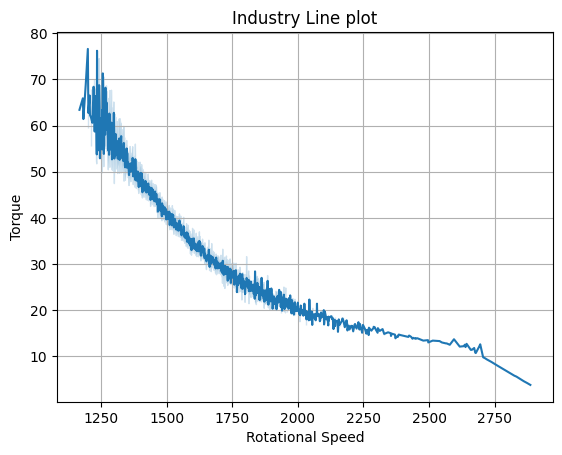

In [66]:
#line plot using seaborn
sns.lineplot(x='Rotational Speed',y='Torque',data=df)
plt.title("Industry Line plot")
plt.grid(True)

Text(0.5, 1.0, 'industry -scatterplot')

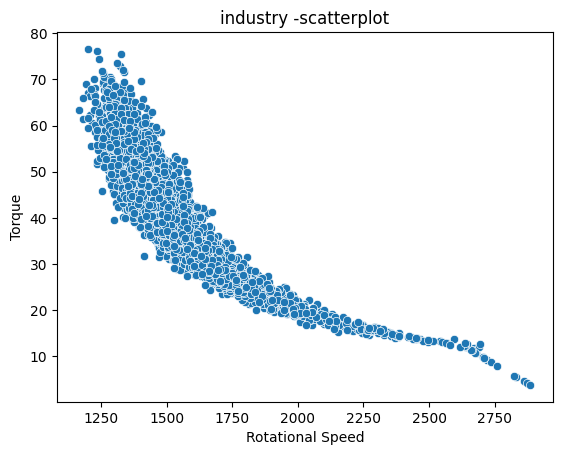

In [67]:
#scatter plot in seaborn
sns.scatterplot(x='Rotational Speed',y='Torque',data=df)
plt.title("industry -scatterplot")

Text(0.5, 1.0, 'Bar diagram')

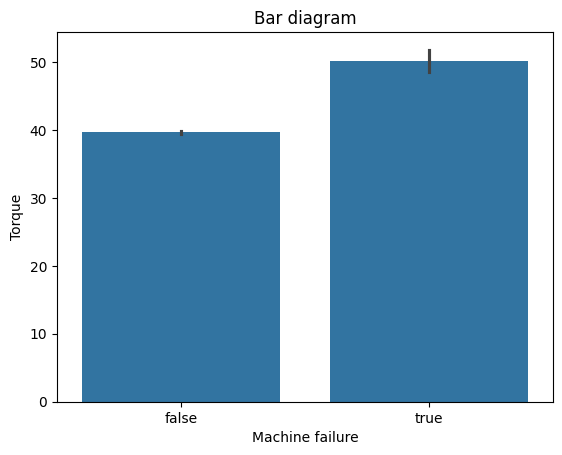

In [68]:
#bar plot 
sns.barplot(x='Machine failure',y='Torque',data=df)
plt.title("Bar diagram")

<Axes: xlabel='Rotational Speed', ylabel='Count'>

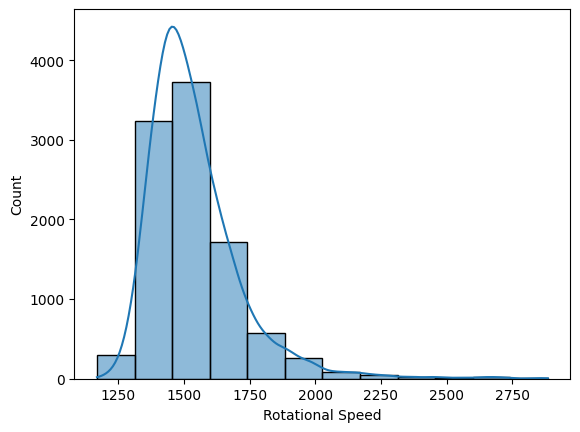

In [69]:
#histogram
sns.histplot(data=df,x='Rotational Speed',bins=12,kde=True)

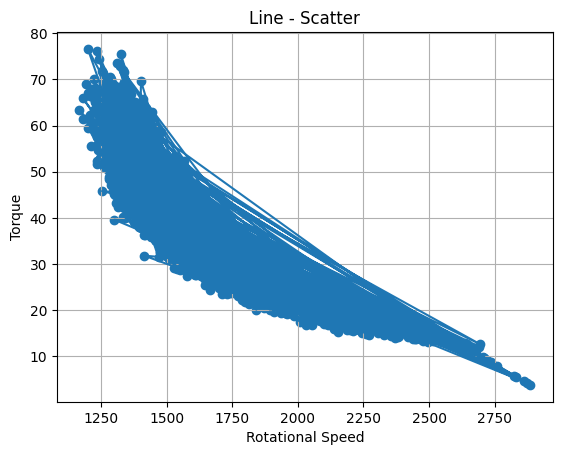

In [70]:
#combination of line plot and scatter plot
plt.scatter(g,l)
plt.plot(g,l)
plt.title("Line - Scatter")
plt.xlabel("Rotational Speed")
plt.ylabel("Torque")
plt.grid()

<Axes: >

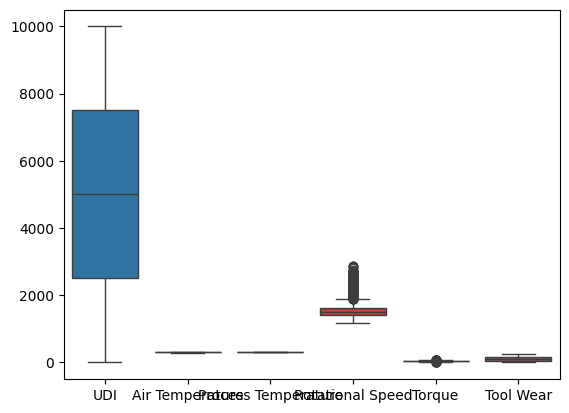

In [71]:
#box plot
sns.boxplot(data=df)

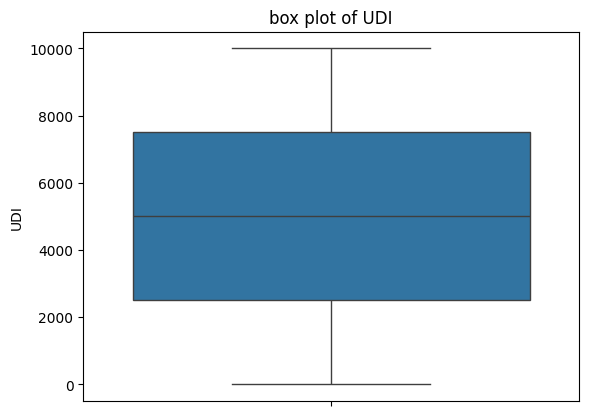

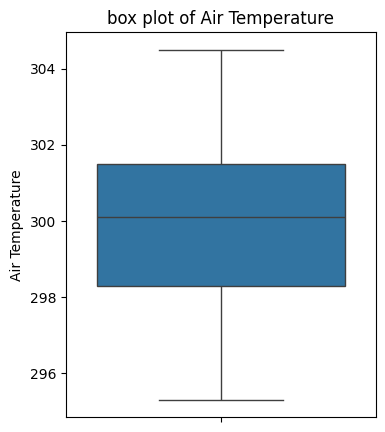

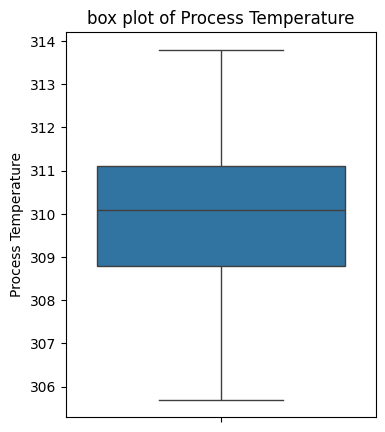

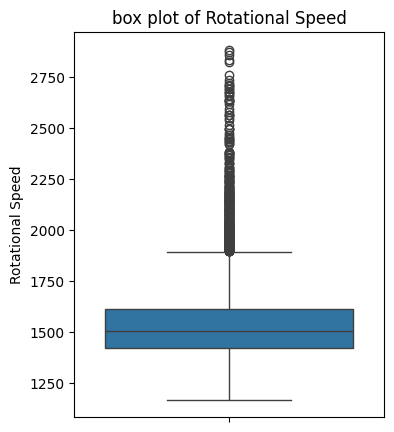

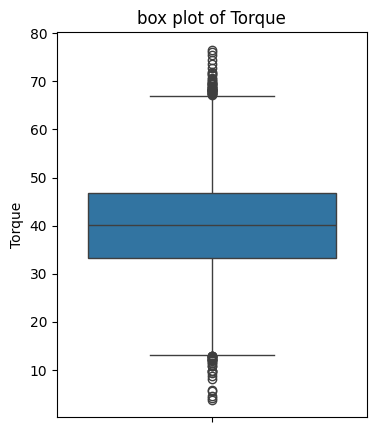

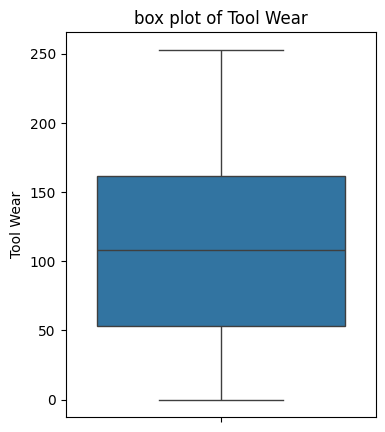

<Figure size 400x500 with 0 Axes>

In [72]:
#box plot for each column
for col in df.select_dtypes(include = 'number').columns:
    sns.boxplot(y=df[col])
    plt.title(f'box plot of {col}')
    plt.figure(figsize=(4,5))

In [73]:
#calculate IQR
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    #define bounce
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    #removing outliers
    clean_data=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)][col]

<Axes: ylabel='Tool Wear'>

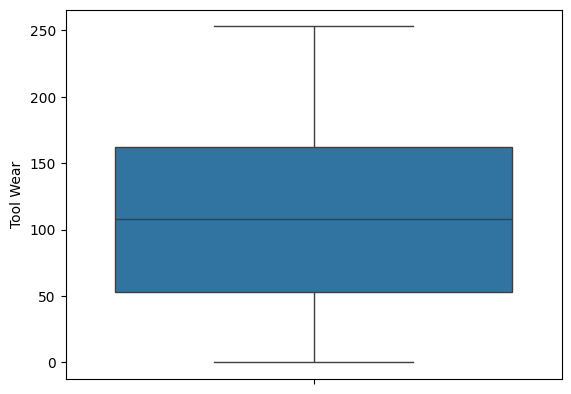

In [74]:
sns.boxplot(y=clean_data)

In [75]:
# Function to apply IQR method to fix outliers
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

In [76]:
df1=fix_outliers_iqr(df)
df1

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551.0,42.8,0,false,false,false,false,false,false
1,2,L47181,L,298.2,308.7,1408.0,46.3,3,false,false,false,false,false,false
2,3,L47182,L,298.1,308.5,1498.0,49.4,5,false,false,false,false,false,false
3,4,L47183,L,298.2,308.6,1433.0,39.5,7,false,false,false,false,false,false
4,5,L47184,L,298.2,308.7,1408.0,40.0,9,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604.0,29.5,14,false,false,false,false,false,false
9996,9997,H39410,H,298.9,308.4,1632.0,31.8,17,false,false,false,false,false,false
9997,9998,M24857,M,299.0,308.6,1645.0,33.4,22,false,false,false,false,false,false
9998,9999,H39412,H,299.0,308.7,1408.0,48.5,25,false,false,false,false,false,false


<Axes: >

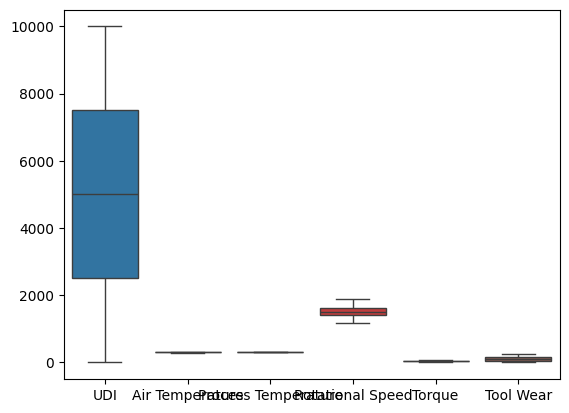

In [77]:
#after removing outliers
sns.boxplot(data=df1)

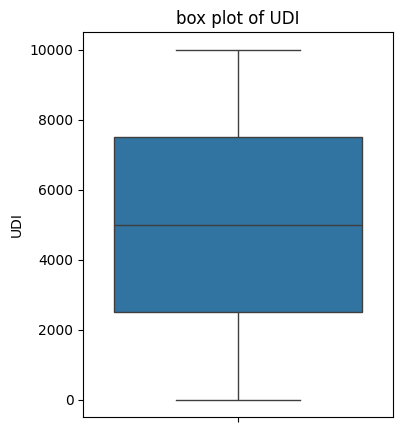

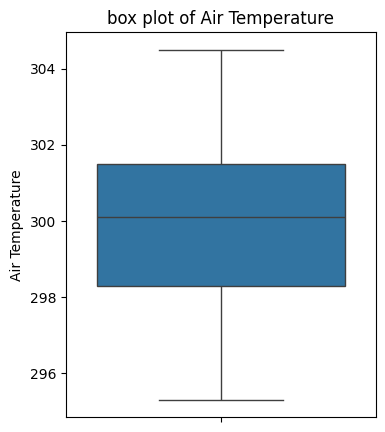

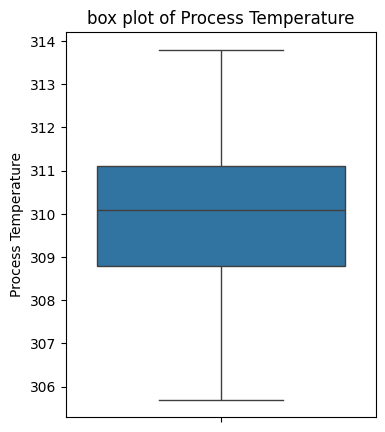

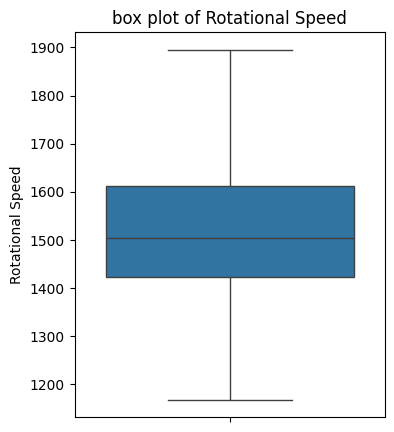

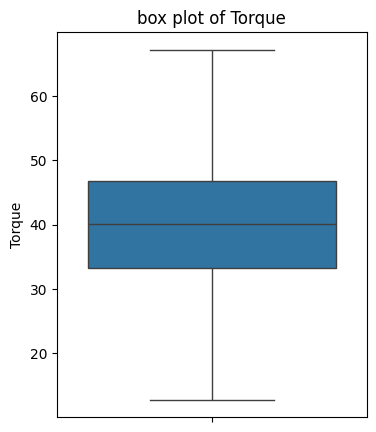

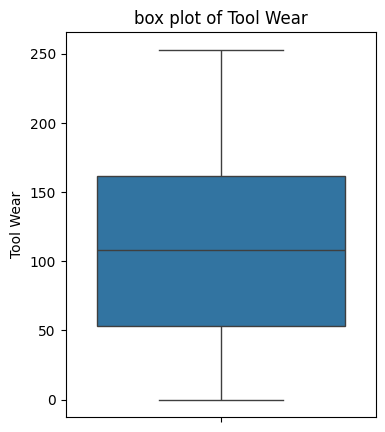

In [78]:
#after removing outliers for each column
for col in df.select_dtypes(include = 'number').columns:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df[col])
    plt.title(f'box plot of {col}')   

In [79]:
#selecting only the numerical columns
numeric_columns = df.select_dtypes(include='number')

In [80]:
numeric_columns

,UDI,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear
0,1,298.1,308.6,1551.0,42.8,0
1,2,298.2,308.7,1408.0,46.3,3
2,3,298.1,308.5,1498.0,49.4,5
3,4,298.2,308.6,1433.0,39.5,7
4,5,298.2,308.7,1408.0,40.0,9
...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604.0,29.5,14
9996,9997,298.9,308.4,1632.0,31.8,17
9997,9998,299.0,308.6,1645.0,33.4,22
9998,9999,299.0,308.7,1408.0,48.5,25


In [81]:
#correlation 
a=numeric_columns.corr()

In [82]:
a

,UDI,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear
UDI,1.000000,0.117428,0.324428,-0.001965,0.002596,-0.010702
Air Temperature,0.117428,1.000000,0.876107,0.021305,-0.013861,0.013853
Process Temperature,0.324428,0.876107,1.000000,0.019892,-0.014294,0.013488
Rotational Speed,-0.001965,0.021305,0.019892,1.000000,-0.911734,0.002496
Torque,0.002596,-0.013861,-0.014294,-0.911734,1.000000,-0.003151
Tool Wear,-0.010702,0.013853,0.013488,0.002496,-0.003151,1.000000


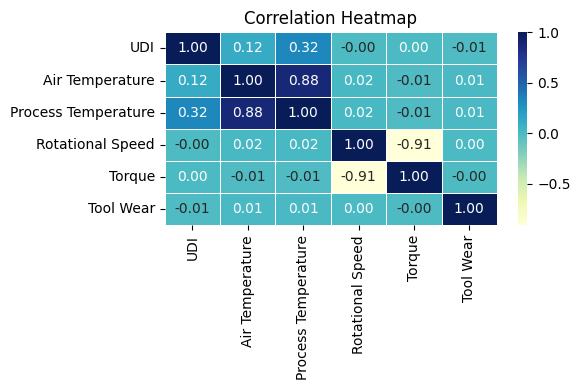

In [83]:
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(a, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [84]:
#90 %and below
#Air Temperature - Process Temperature



In [85]:
#0%
#Torque -UID
#Torque - Tool Wear
#Rotational Speed - Tool Wear
#Rotational Speed - UDI


In [86]:
#30%
#Process Temperature - UID


In [87]:
#-0.9
#Torque - Rotational Speed

In [88]:
#skewness
a.skew()

UDI                    1.945364
Air Temperature        0.961054
Process Temperature    0.729402
Rotational Speed       0.166975
Torque                 0.253917
Tool Wear              2.446471
dtype: float64

In [89]:
df['Torque'].skew()

np.float64(-0.017482561679546125)

In [90]:
#power transformer method
pt= PowerTransformer(method= 'yeo-johnson')

In [91]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [92]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [93]:
df_transformed.skew()

UDI                   -0.290307
Air Temperature        0.000000
Process Temperature    0.000294
Rotational Speed       0.028783
Torque                -0.016626
Tool Wear             -0.285286
dtype: float64

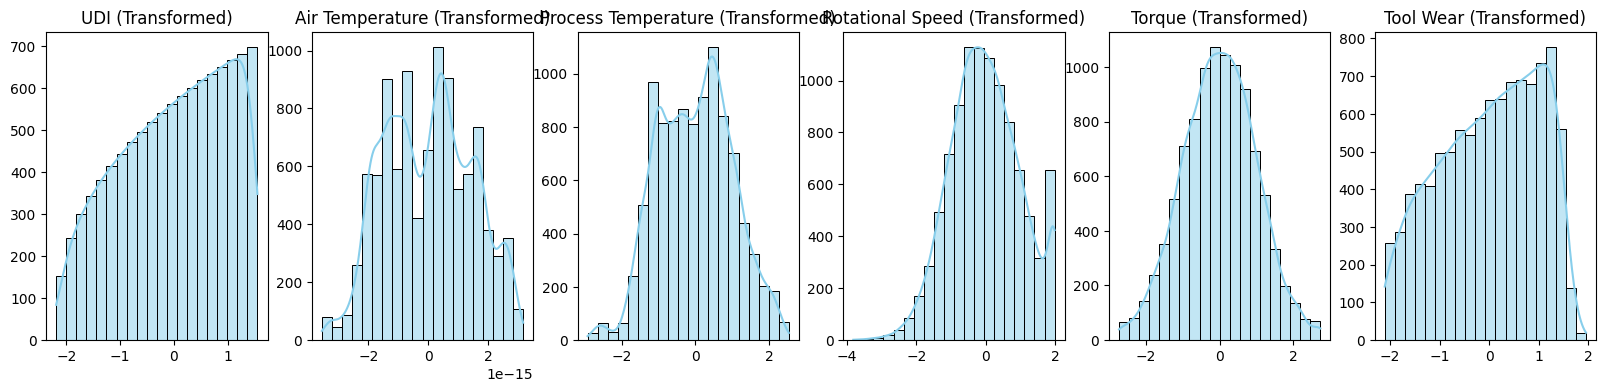

In [94]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

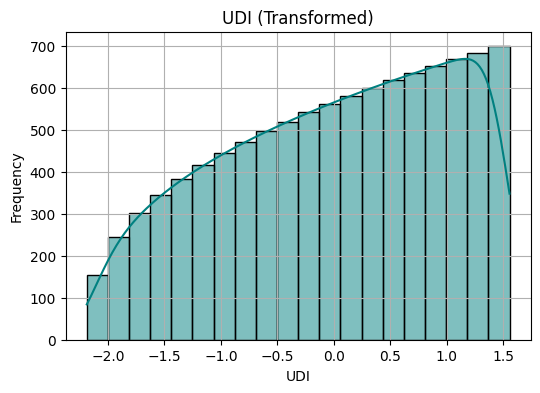

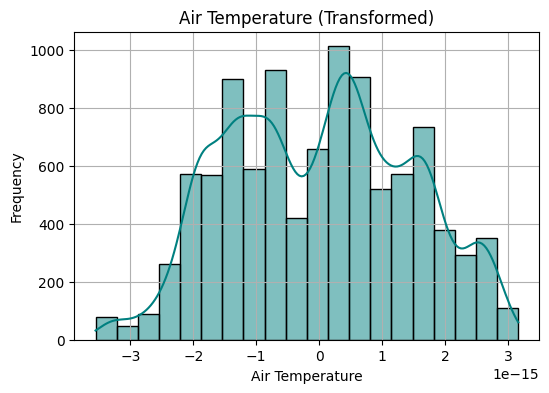

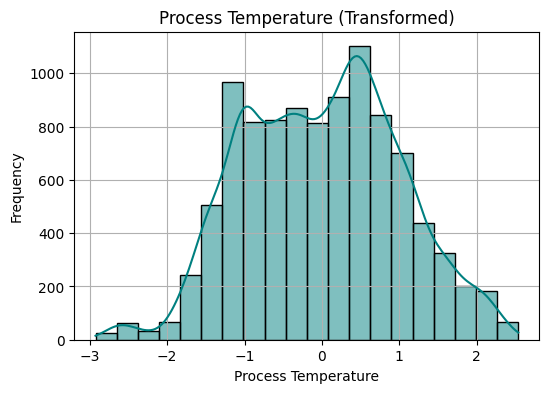

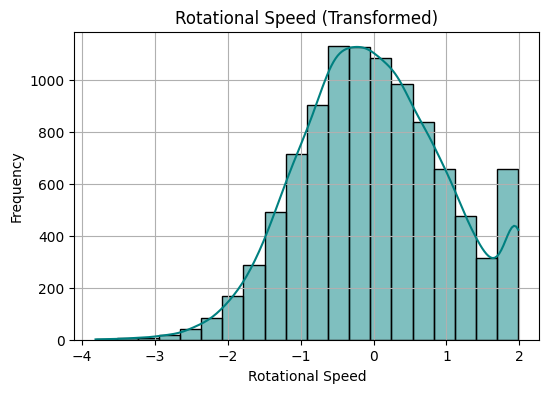

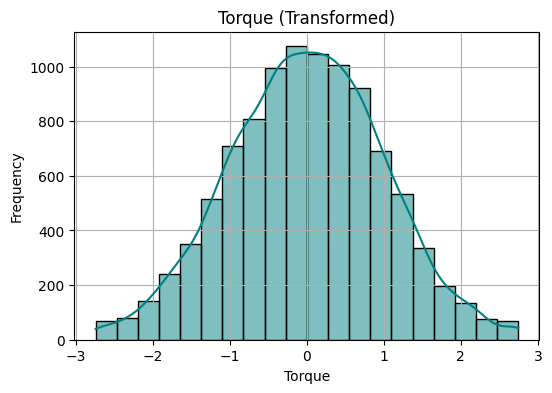

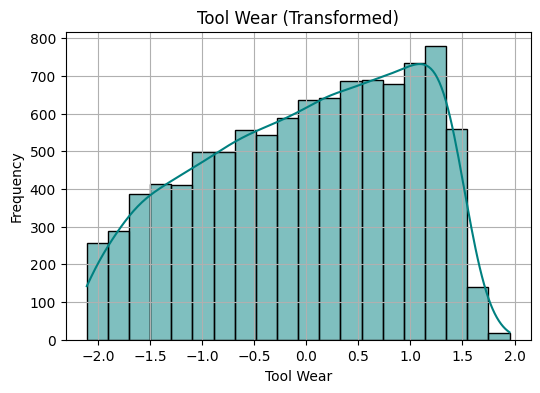

In [95]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

In [96]:
df

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551.0,42.8,0,false,false,false,false,false,false
1,2,L47181,L,298.2,308.7,1408.0,46.3,3,false,false,false,false,false,false
2,3,L47182,L,298.1,308.5,1498.0,49.4,5,false,false,false,false,false,false
3,4,L47183,L,298.2,308.6,1433.0,39.5,7,false,false,false,false,false,false
4,5,L47184,L,298.2,308.7,1408.0,40.0,9,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604.0,29.5,14,false,false,false,false,false,false
9996,9997,H39410,H,298.9,308.4,1632.0,31.8,17,false,false,false,false,false,false
9997,9998,M24857,M,299.0,308.6,1645.0,33.4,22,false,false,false,false,false,false
9998,9999,H39412,H,299.0,308.7,1408.0,48.5,25,false,false,false,false,false,false


In [97]:
#label Encoding
le= LabelEncoder()

In [98]:
df['Machine failure']=le.fit_transform(df['Machine failure'])

In [99]:
df['Type']=le.fit_transform(df['Type'])

In [100]:
df['TWF']=le.fit_transform(df['TWF'])

In [101]:
df['HDF']=le.fit_transform(df['HDF'])

In [102]:
df['PWF']=le.fit_transform(df['PWF'])

In [103]:
df['OSF']=le.fit_transform(df['OSF'])

In [104]:
df['RNF']=le.fit_transform(df['RNF'])

In [105]:
df['Product ID']=le.fit_transform(df['Product ID'])

In [106]:
df

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,2,1003,1,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,3,1004,1,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,4,1005,1,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,5,1006,1,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0
9996,9997,1001,0,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,0
9997,9998,9998,2,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0
9998,9999,1002,0,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,0


In [107]:
df['HDF'].value_counts()

HDF
0    9885
1     115
Name: count, dtype: int64

In [108]:
#one hot encoding
ohe=OneHotEncoder(sparse_output=False)

In [109]:
hdf=ohe.fit_transform(df[['HDF']])

In [110]:
cols=ohe.get_feature_names_out(['HDF'])

In [111]:
df_encoded=pd.DataFrame(hdf,columns=cols)

In [112]:
df_encoded

,HDF_0,HDF_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [113]:
merge=pd.concat([df.drop('HDF',axis=1),df_encoded],axis=1)

In [114]:
merge

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,PWF,OSF,RNF,HDF_0,HDF_1
0,1,7003,2,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,1.0,0.0
1,2,1003,1,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,1.0,0.0
2,3,1004,1,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,1.0,0.0
3,4,1005,1,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,1.0,0.0
4,5,1006,1,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,1.0,0.0
9996,9997,1001,0,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,1.0,0.0
9997,9998,9998,2,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,1.0,0.0
9998,9999,1002,0,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,1.0,0.0


In [115]:
df['TWF'].value_counts()

TWF
0    9954
1      46
Name: count, dtype: int64

In [116]:
ohe=OneHotEncoder(sparse_output=False)

In [117]:
twf=ohe.fit_transform(df[['TWF']])

In [118]:
cols=ohe.get_feature_names_out(['TWF'])

In [119]:
df_encoded=pd.DataFrame(twf,columns=cols)

In [120]:
df_encoded

,TWF_0,TWF_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [121]:
df1=pd.concat([merge.drop('TWF',axis=1),df_encoded],axis=1)

In [122]:
df1

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,PWF,OSF,RNF,HDF_0,HDF_1,TWF_0,TWF_1
0,1,7003,2,298.1,308.6,1551.0,42.8,0,0,0,0,0,1.0,0.0,1.0,0.0
1,2,1003,1,298.2,308.7,1408.0,46.3,3,0,0,0,0,1.0,0.0,1.0,0.0
2,3,1004,1,298.1,308.5,1498.0,49.4,5,0,0,0,0,1.0,0.0,1.0,0.0
3,4,1005,1,298.2,308.6,1433.0,39.5,7,0,0,0,0,1.0,0.0,1.0,0.0
4,5,1006,1,298.2,308.7,1408.0,40.0,9,0,0,0,0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604.0,29.5,14,0,0,0,0,1.0,0.0,1.0,0.0
9996,9997,1001,0,298.9,308.4,1632.0,31.8,17,0,0,0,0,1.0,0.0,1.0,0.0
9997,9998,9998,2,299.0,308.6,1645.0,33.4,22,0,0,0,0,1.0,0.0,1.0,0.0
9998,9999,1002,0,299.0,308.7,1408.0,48.5,25,0,0,0,0,1.0,0.0,1.0,0.0


In [123]:
df['OSF'].value_counts()

OSF
0    9902
1      98
Name: count, dtype: int64

In [124]:
ohe=OneHotEncoder(sparse_output=False)

In [125]:
osf=ohe.fit_transform(df[['OSF']])

In [126]:
cols=ohe.get_feature_names_out(['OSF'])

In [127]:
df_encoded=pd.DataFrame(osf,columns=cols)

In [128]:
df_encoded

,OSF_0,OSF_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [129]:
df2=pd.concat([df1.drop('OSF',axis=1),df_encoded],axis=1)

In [130]:
df2

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,PWF,RNF,HDF_0,HDF_1,TWF_0,TWF_1,OSF_0,OSF_1
0,1,7003,2,298.1,308.6,1551.0,42.8,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,1003,1,298.2,308.7,1408.0,46.3,3,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1004,1,298.1,308.5,1498.0,49.4,5,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,1005,1,298.2,308.6,1433.0,39.5,7,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1006,1,298.2,308.7,1408.0,40.0,9,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604.0,29.5,14,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
9996,9997,1001,0,298.9,308.4,1632.0,31.8,17,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
9997,9998,9998,2,299.0,308.6,1645.0,33.4,22,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
9998,9999,1002,0,299.0,308.7,1408.0,48.5,25,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0


In [131]:
df['PWF'].value_counts()

PWF
0    9905
1      95
Name: count, dtype: int64

In [132]:
ohe=OneHotEncoder(sparse_output=False)

In [133]:
pwf=ohe.fit_transform(df[['PWF']])

In [134]:
cols=ohe.get_feature_names_out(['PWF'])

In [135]:
df_encoded=pd.DataFrame(pwf,columns=cols)

In [136]:
df_encoded

,PWF_0,PWF_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [137]:
df3=pd.concat([df2.drop('PWF',axis=1),df_encoded],axis=1)

In [138]:
df3

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,RNF,HDF_0,HDF_1,TWF_0,TWF_1,OSF_0,OSF_1,PWF_0,PWF_1
0,1,7003,2,298.1,308.6,1551.0,42.8,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,1003,1,298.2,308.7,1408.0,46.3,3,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1004,1,298.1,308.5,1498.0,49.4,5,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,1005,1,298.2,308.6,1433.0,39.5,7,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1006,1,298.2,308.7,1408.0,40.0,9,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604.0,29.5,14,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9996,9997,1001,0,298.9,308.4,1632.0,31.8,17,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9997,9998,9998,2,299.0,308.6,1645.0,33.4,22,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9998,9999,1002,0,299.0,308.7,1408.0,48.5,25,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [139]:
df['Type'].value_counts()

Type
1    6000
2    2997
0    1003
Name: count, dtype: int64

In [140]:
ohe=OneHotEncoder(sparse_output=False)

In [141]:
typ=ohe.fit_transform(df[['Type']])

In [142]:
cols=ohe.get_feature_names_out(['Type'])

In [143]:
df_encoded=pd.DataFrame(typ,columns=cols)

In [144]:
df_encoded

,Type_0,Type_1,Type_2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [145]:
df4=pd.concat([df3.drop('Type',axis=1),df_encoded],axis=1)

In [146]:
df4

,UDI,Product ID,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,RNF,HDF_0,HDF_1,TWF_0,TWF_1,OSF_0,OSF_1,PWF_0,PWF_1,Type_0,Type_1,Type_2
0,1,7003,298.1,308.6,1551.0,42.8,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1003,298.2,308.7,1408.0,46.3,3,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1004,298.1,308.5,1498.0,49.4,5,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1005,298.2,308.6,1433.0,39.5,7,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,1006,298.2,308.7,1408.0,40.0,9,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,298.8,308.4,1604.0,29.5,14,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,9997,1001,298.9,308.4,1632.0,31.8,17,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9997,9998,9998,299.0,308.6,1645.0,33.4,22,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,9999,1002,299.0,308.7,1408.0,48.5,25,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [147]:
df['RNF'].value_counts()

RNF
0    9981
1      19
Name: count, dtype: int64

In [148]:
ohe=OneHotEncoder(sparse_output=False)

In [149]:
rnf=ohe.fit_transform(df[['RNF']])

In [150]:
cols=ohe.get_feature_names_out(['RNF'])

In [151]:
df_encoded=pd.DataFrame(rnf,columns=cols)

In [152]:
df_encoded

,RNF_0,RNF_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [153]:
df5=pd.concat([df4.drop('RNF',axis=1),df_encoded],axis=1)

In [154]:
df5

,UDI,Product ID,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,HDF_0,HDF_1,...,TWF_1,OSF_0,OSF_1,PWF_0,PWF_1,Type_0,Type_1,Type_2,RNF_0,RNF_1
0,1,7003,298.1,308.6,1551.0,42.8,0,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,1003,298.2,308.7,1408.0,46.3,3,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,1004,298.1,308.5,1498.0,49.4,5,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1005,298.2,308.6,1433.0,39.5,7,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5,1006,298.2,308.7,1408.0,40.0,9,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,298.8,308.4,1604.0,29.5,14,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,9997,1001,298.9,308.4,1632.0,31.8,17,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,9998,9998,299.0,308.6,1645.0,33.4,22,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9998,9999,1002,299.0,308.7,1408.0,48.5,25,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [155]:
print('length of original data frame ',len(df5))

length of original data frame  10000


In [156]:
#smote Technique
smote=SMOTE()

In [157]:
x_smote, y_smote =smote.fit_resample(df5[(i for i in list (df5.describe(include='all').columns)if i !='Machine failure')],df5['Machine failure'])

In [158]:
print('length of y smote', len(y_smote))

length of y smote 19322


In [159]:
#balancing the x and y 
balanced_df=pd.DataFrame(x_smote, columns=list(i for i in list(df5.describe(include='all').columns)if i!='Machine failure'))

In [160]:
balanced_df

,UDI,Product ID,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,HDF_0,HDF_1,TWF_0,TWF_1,OSF_0,OSF_1,PWF_0,PWF_1,Type_0,Type_1,Type_2,RNF_0,RNF_1
0,1,7003,298.100000,308.600000,1551.000000,42.800000,0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.0,1.0,0.0
1,2,1003,298.200000,308.700000,1408.000000,46.300000,3,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
2,3,1004,298.100000,308.500000,1498.000000,49.400000,5,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
3,4,1005,298.200000,308.600000,1433.000000,39.500000,7,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
4,5,1006,298.200000,308.700000,1408.000000,40.000000,9,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19317,4957,3990,303.604140,312.556210,1323.052555,61.784712,146,1.0,0.0,1.0,0.0,0.479299,0.520701,0.520701,0.479299,0.0,1.0,0.0,1.0,0.0
19318,437,1270,297.432247,308.571011,1895.500000,12.800000,120,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.0,1.0,0.0
19319,5274,8577,303.436016,312.636016,1895.500000,12.800000,57,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.0,0.0,1.0,1.0,0.0
19320,4939,3979,303.517527,312.464437,1313.200693,64.702542,99,1.0,0.0,1.0,0.0,0.706181,0.293819,0.293819,0.706181,0.0,1.0,0.0,1.0,0.0


In [161]:
balanced_df['Machine failure'] = y_smote

In [162]:
balanced_df.shape

(19322, 21)

In [163]:
balanced_df['Machine failure'].value_counts()

Machine failure
0    9661
1    9661
Name: count, dtype: int64

In [164]:
#feature Selection
skb=SelectKBest(score_func=f_classif,k=20)

In [165]:
balanced_df.columns

Index(['UDI', 'Product ID', 'Air Temperature', 'Process Temperature',
       'Rotational Speed', 'Torque', 'Tool Wear', 'HDF_0', 'HDF_1', 'TWF_0',
       'TWF_1', 'OSF_0', 'OSF_1', 'PWF_0', 'PWF_1', 'Type_0', 'Type_1',
       'Type_2', 'RNF_0', 'RNF_1', 'Machine failure'],
      dtype='object')

In [166]:
Y=balanced_df['Machine failure']

In [167]:
X=balanced_df.drop('Machine failure',axis=1)

In [168]:
X.columns

Index(['UDI', 'Product ID', 'Air Temperature', 'Process Temperature',
       'Rotational Speed', 'Torque', 'Tool Wear', 'HDF_0', 'HDF_1', 'TWF_0',
       'TWF_1', 'OSF_0', 'OSF_1', 'PWF_0', 'PWF_1', 'Type_0', 'Type_1',
       'Type_2', 'RNF_0', 'RNF_1'],
      dtype='object')

In [169]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
19317    1
19318    1
19319    1
19320    1
19321    1
Name: Machine failure, Length: 19322, dtype: int64

In [170]:
X_new=skb.fit_transform(X,Y)

In [171]:
selected_columns=X.columns[skb.get_support()]

In [172]:
selected_columns 

Index(['UDI', 'Product ID', 'Air Temperature', 'Process Temperature',
       'Rotational Speed', 'Torque', 'Tool Wear', 'HDF_0', 'HDF_1', 'TWF_0',
       'TWF_1', 'OSF_0', 'OSF_1', 'PWF_0', 'PWF_1', 'Type_0', 'Type_1',
       'Type_2', 'RNF_0', 'RNF_1'],
      dtype='object')

In [173]:
feature_scores =pd.DataFrame({'feature':X.columns,'score':skb.scores_}).sort_values(by='score',ascending=False)

In [174]:
feature_scores

,feature,score
8,HDF_1,5676.525505
7,HDF_0,5676.525505
11,OSF_0,5280.480366
12,OSF_1,5280.480366
5,Torque,4838.438063
14,PWF_1,4456.961887
13,PWF_0,4456.961887
4,Rotational Speed,2998.788142
9,TWF_0,1968.659815
10,TWF_1,1968.659815


In [175]:
X_selected=X[selected_columns]

In [176]:
X_selected

,UDI,Product ID,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,HDF_0,HDF_1,TWF_0,TWF_1,OSF_0,OSF_1,PWF_0,PWF_1,Type_0,Type_1,Type_2,RNF_0,RNF_1
0,1,7003,298.100000,308.600000,1551.000000,42.800000,0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.0,1.0,0.0
1,2,1003,298.200000,308.700000,1408.000000,46.300000,3,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
2,3,1004,298.100000,308.500000,1498.000000,49.400000,5,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
3,4,1005,298.200000,308.600000,1433.000000,39.500000,7,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
4,5,1006,298.200000,308.700000,1408.000000,40.000000,9,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19317,4957,3990,303.604140,312.556210,1323.052555,61.784712,146,1.0,0.0,1.0,0.0,0.479299,0.520701,0.520701,0.479299,0.0,1.0,0.0,1.0,0.0
19318,437,1270,297.432247,308.571011,1895.500000,12.800000,120,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.0,1.0,0.0
19319,5274,8577,303.436016,312.636016,1895.500000,12.800000,57,1.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.0,0.0,1.0,1.0,0.0
19320,4939,3979,303.517527,312.464437,1313.200693,64.702542,99,1.0,0.0,1.0,0.0,0.706181,0.293819,0.293819,0.706181,0.0,1.0,0.0,1.0,0.0


In [177]:
#scaling
ss=StandardScaler()

In [178]:
X_scaled=ss.fit_transform(X_selected)

In [179]:
X_scaled

array([[-1.81672218,  0.7770093 , -1.12322502, ...,  1.63633095,
         0.05966487, -0.05966487],
       [-1.81634629, -1.4051946 , -1.07510267, ..., -0.61112332,
         0.05966487, -0.05966487],
       [-1.81597039, -1.4048309 , -1.12322502, ..., -0.61112332,
         0.05966487, -0.05966487],
       ...,
       [ 0.16538437,  1.34947412,  1.44459108, ...,  1.63633095,
         0.05966487, -0.05966487],
       [ 0.03945877, -0.32282146,  1.48381624, ..., -0.61112332,
         0.05966487, -0.05966487],
       [ 0.97544309,  0.2165466 , -0.03928718, ..., -0.61112332,
         0.05966487, -0.05966487]], shape=(19322, 20))

In [180]:
#train, test , split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=40)

In [181]:
print("X_train shape" ,X_train.shape)

X_train shape (15457, 20)


In [182]:
print("Y_train shape",Y_train.shape)

Y_train shape (15457,)


In [183]:
print("X_test shape",X_test.shape)

X_test shape (3865, 20)


In [184]:
print("Y_test shape",Y_test.shape)

Y_test shape (3865,)


In [185]:
Y.value_counts()

Machine failure
0    9661
1    9661
Name: count, dtype: int64

In [186]:
#Logistic regression  Algorithm
lr = LogisticRegression()

In [187]:
lr.fit(X_train,Y_train) #Loading the Algorithm

LogisticRegression()

In [188]:
Y_pred_lr=lr.predict(X_test) #using predict function
Y_pred_lr

array([1, 0, 0, ..., 0, 0, 1], shape=(3865,))

In [189]:
#finding accuracy
accuracy= accuracy_score(Y_test,Y_pred_lr)
accuracy

0.9971539456662355

In [190]:
#classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1929
           1       1.00      0.99      1.00      1936

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



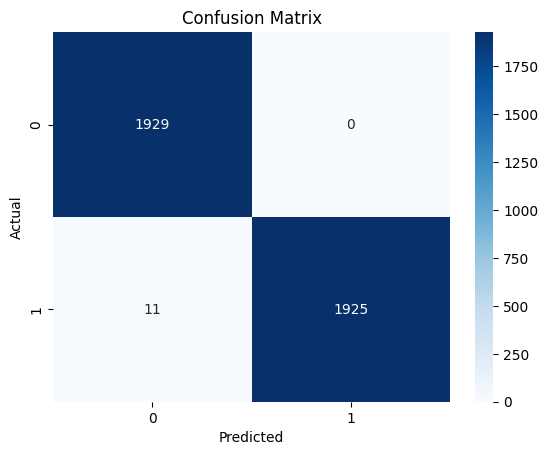

In [191]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr) #building the matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") #heatmap for matrix , cmap represents color , fmt="d" is the annotations will be formatted as integers.
plt.xlabel("Predicted") #xaxis label
plt.ylabel("Actual") #y axis label
plt.title("Confusion Matrix") #title
plt.show() #display

In [192]:
#Decision Tree classification Algorithm 

In [193]:
dt=DecisionTreeClassifier()

In [194]:
dt.fit(X_train , Y_train)  #loading the algorithm

DecisionTreeClassifier()

In [195]:
Y_pred = dt.predict(X_test) #using predict function
Y_pred

array([1, 0, 0, ..., 0, 0, 1], shape=(3865,))

In [196]:
#finding accuracy
accuracy = accuracy_score(Y_test , Y_pred)
accuracy

0.9992238033635188

In [197]:
#finding Classification Report
print("\n Classification Report \n", classification_report(Y_test , Y_pred))


 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1929
           1       1.00      1.00      1.00      1936

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



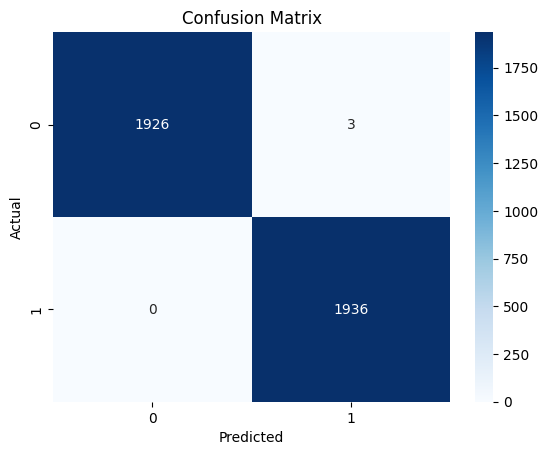

In [198]:
#confusion matrix
confusion_mat = confusion_matrix(Y_test , Y_pred) #building the matrix
sns.heatmap(confusion_mat , annot=True , fmt="d" , cmap="Blues") #heatmap for matrix , cmap represents color , fmt="d" is the annotations will be formatted as integers.
plt.xlabel("Predicted") #x axis name
plt.ylabel("Actual") #y axis name
plt.title("Confusion Matrix") #show title
plt.show() #display

In [199]:
sv= SVC()

In [200]:
sv.fit(X_train ,Y_train) #loading the algorithm

SVC()

In [201]:
Y_predict= sv.predict(X_test)

In [202]:
Y_predict

array([1, 0, 0, ..., 0, 0, 1], shape=(3865,))

In [203]:
#finding accuracy
accuracy = accuracy_score(Y_test ,Y_predict)
accuracy

0.9971539456662355

In [204]:
#classification report
print("\n Classification Report \n", classification_report(Y_test, Y_predict))


 Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1929
           1       1.00      0.99      1.00      1936

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



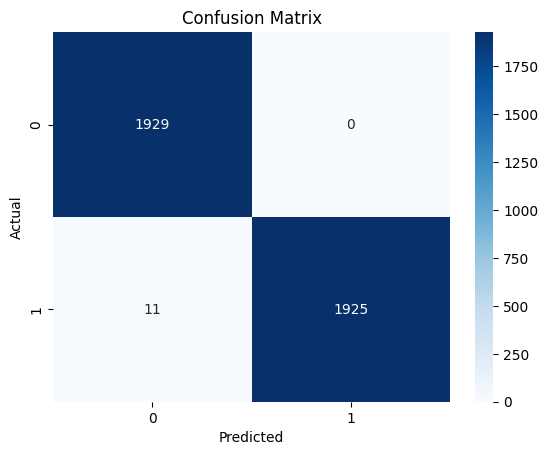

In [205]:
#confusion matrix
confusion_mat = confusion_matrix(Y_test , Y_predict) #building the matrix
sns.heatmap(confusion_mat, annot=True , fmt="d", cmap="Blues") #heatmap for matrix , cmap represents color , fmt="d" is the annotations will be formatted as integers.
plt.xlabel("Predicted") #x axis name
plt.ylabel("Actual") #y axis name
plt.title("Confusion Matrix") #shows title
plt.show() #displays

In [206]:
#Naive Bias Algorithm -Gaussian

In [207]:
nb= GaussianNB()

In [208]:
nb.fit(X_train ,Y_train) #loading the algorithm

GaussianNB()

In [209]:
y_predict_nb=nb.predict(X_test) #using predict function to test
y_predict_nb

array([1, 0, 0, ..., 0, 0, 1], shape=(3865,))

In [210]:
#accuracy
accuracy = accuracy_score(Y_test, y_predict_nb)

In [211]:
#classification report
print("\n Classification Report \n", classification_report(Y_test, y_predict_nb))


 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1929
           1       1.00      1.00      1.00      1936

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



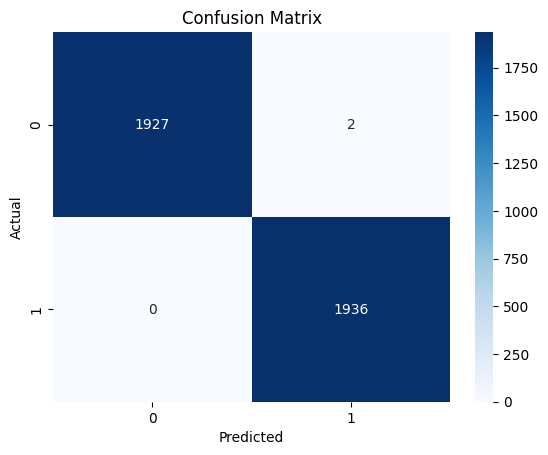

In [213]:
#confusion matrix
confusion_mat=confusion_matrix(Y_test, y_predict_nb) #building the matrix
sns.heatmap(confusion_mat, annot=True , fmt="d" , cmap="Blues") 
plt.xlabel("Predicted") #x axis name
plt.ylabel("Actual") #y axis name
plt.title("Confusion Matrix") #shows title
plt.show() #Displays
            